# Завдання 1: Напиши Python-скрипт, який:

Отримує HTML-код сторінки з погодними даними:

http://cgo-sreznevskyi.kyiv.ua/uk/diialnist/meteorolohichna/meteorolohichni-dani-meteostantsii-kyiv-na-9-hodynu-ranku

Знаходить першу таблицю на сторінці

Проходить по кожному рядку таблиці (крім заголовка)

З кожного рядка витягує тільки три значення:

●дату

●температуру повітря

●відносну вологість

Зберігає ці значення у вигляді списку словників такого типу:

[{'Дата': '09.05.2025', 'Температура': '+15.3', 'Вологість': '67%'},

   {'Дата': '08.05.2025', 'Температура': '+13.1', 'Вологість': '71%'}]

Алгоритм:

●Імпортуй бібліотеки requests та BeautifulSoup

●Зроби GET-запит до сторінки з таблицею

●Розпарси HTML відповідь за допомогою BeautifulSoup

●Знайди елемент <table> — першу таблицю на сторінці

●Пройди по рядках таблиці (пропусти заголовок): for tr in table.find_all("tr")[1:]:

●Витягни записи кожного рядка: cells = [td.text.strip() for td in tr.find_all("td")]

●З кожного рядка витягни перші три комірки — Дата, Температура, Вологість

●Створи словник з цими значеннями

●Додай словник до списку

●Виведи або повертай список

In [ ]:
import requests               # Імпортуємо бібліотеку для HTTP-запитів
from bs4 import BeautifulSoup # Імпортуємо бібліотеку для парсингу HTML-коду

# --- Отримуємо HTML-код сторінки ---
url = "http://cgo-sreznevskyi.kyiv.ua/uk/diialnist/meteorolohichna/meteorolohichni-dani-meteostantsii-kyiv-na-9-hodynu-ranku"
response = requests.get(url)
     # Робимо GET-запит до вказаної веб-сторінки

html = response.text
     # Отримуємо HTML-код з відповіді сервера

soup = BeautifulSoup(html, "html.parser")
     # Створюємо об'єкт BeautifulSoup для зручного аналізу HTML

# --- Знаходимо першу таблицю на сторінці ---
table = soup.find("table")
     # Знаходимо перший тег <table> на сторінці

# --- Підготуємо список для збереження результатів ---
data_list = []
     # Створюємо порожній список, куди будемо додавати словники з даними

# --- Проходимо по кожному рядку таблиці, крім заголовка ---
for tr in table.find_all("tr")[1:]:
     # Ітеруємо по всіх рядках таблиці, крім першого (заголовка)

    cells = [td.text.strip() for td in tr.find_all("td")]
         # Витягуємо текст з усіх комірок рядка, очищаючи пробіли

    if len(cells) >= 3:
         # Перевіряємо, чи в рядку є хоча б три комірки (дата, температура, вологість)

        date = cells[0]
             # Перша комірка — це дата

        temperature = cells[1]
             # Друга комірка — температура повітря

        humidity = cells[2]
             # Третя комірка — відносна вологість

        record = {
             # Створюємо словник з отриманих значень
            'Дата': date,
            'Температура': temperature,
            'Вологість': humidity
        }

        data_list.append(record)
             # Додаємо словник до загального списку

# --- Виводимо результати ---
print(data_list)
     # Виводимо список словників з погодними даними


[{'Дата': '19.05.2025', 'Температура': '12.8', 'Вологість': '72'}, {'Дата': '18.05.2025', 'Температура': '12.3', 'Вологість': '78'}, {'Дата': '17.05.2025', 'Температура': '10.4', 'Вологість': '91'}, {'Дата': '16.05.2025', 'Температура': '6.2', 'Вологість': '92'}, {'Дата': '15.05.2025', 'Температура': '12.1', 'Вологість': '76'}, {'Дата': '14.05.2025', 'Температура': '10.7', 'Вологість': '63'}, {'Дата': '13.05.2025', 'Температура': '10.0', 'Вологість': '64'}, {'Дата': '12.05.2025', 'Температура': '10.4', 'Вологість': '52'}, {'Дата': '11.05.2025', 'Температура': '8.0', 'Вологість': '77'}, {'Дата': '10.05.2025', 'Температура': '8.3', 'Вологість': '51'}, {'Дата': '09.05.2025', 'Температура': '5.7', 'Вологість': '79'}, {'Дата': '08.05.2025', 'Температура': '7.5', 'Вологість': '67'}, {'Дата': '07.05.2025', 'Температура': '9.8', 'Вологість': '72'}, {'Дата': '06.05.2025', 'Температура': '8.2', 'Вологість': '73'}, {'Дата': '05.05.2025', 'Температура': '13.1', 'Вологість': '64'}, {'Дата': '04.05.

## Додатково: можливість  зберегти в CSV та обробляти помилки

In [ ]:
import requests                  # Бібліотека для HTTP-запитів
from bs4 import BeautifulSoup    # Бібліотека для парсингу HTML
import csv                       # Бібліотека для роботи з CSV-файлами

# --- Спробуємо отримати HTML-код сторінки з обробкою помилок ---
try:
    url = "http://cgo-sreznevskyi.kyiv.ua/uk/diialnist/meteorolohichna/meteorolohichni-dani-meteostantsii-kyiv-na-9-hodynu-ranku"
    response = requests.get(url)
         # Робимо GET-запит до сторінки

    response.raise_for_status()
         # Викликаємо помилку, якщо відповідь не є успішною (напр. 404)

    html = response.text
         # Отримуємо HTML-код сторінки

except requests.RequestException as e:
    print("Помилка при завантаженні сторінки:", e)
         # Виводимо повідомлення про помилку
    exit()
         # Завершуємо програму, якщо не вдалося отримати сторінку

# --- Парсимо HTML та шукаємо першу таблицю ---
soup = BeautifulSoup(html, "html.parser")
     # Створюємо обʼєкт BeautifulSoup для обробки HTML

table = soup.find("table")
     # Шукаємо першу таблицю на сторінці

if not table:
    print("Не знайдено таблицю на сторінці.")
    exit()
     # Якщо таблиця не знайдена — завершуємо програму

# --- Обробляємо таблицю ---
data_list = []   # Список для збереження результатів

for tr in table.find_all("tr")[1:]:
     # Повторюємо по кожному рядку таблиці, крім заголовка

    cells = [td.text.strip() for td in tr.find_all("td")]
         # Витягуємо текст з кожної комірки

    if len(cells) >= 3:
        date = cells[0]
        temperature = cells[1]
        humidity = cells[2]

        record = {
            'Дата': date,
            'Температура': temperature,
            'Вологість': humidity
        }

        data_list.append(record)
         # Додаємо словник до списку

# --- Виводимо список результатів ---
print("Отримані дані:")
for item in data_list:
    print(item)

# --- Зберігаємо результати у CSV-файл ---
csv_file = "weather_data.csv"
     # Назва файлу для збереження

try:
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
         # Відкриваємо файл для запису (у режимі 'write')

        writer = csv.DictWriter(file, fieldnames=['Дата', 'Температура', 'Вологість'])
             # Створюємо обʼєкт для запису словників у CSV

        writer.writeheader()
             # Записуємо заголовки таблиці

        for row in data_list:
            writer.writerow(row)
             # Записуємо кожен рядок у файл

    print(f"\nДані успішно збережені у файл '{csv_file}'")

except IOError as e:
    print("Помилка при записі у файл:", e)
         # Повідомлення, якщо щось пішло не так під час запису


Отримані дані:
{'Дата': '19.05.2025', 'Температура': '12.8', 'Вологість': '72'}
{'Дата': '18.05.2025', 'Температура': '12.3', 'Вологість': '78'}
{'Дата': '17.05.2025', 'Температура': '10.4', 'Вологість': '91'}
{'Дата': '16.05.2025', 'Температура': '6.2', 'Вологість': '92'}
{'Дата': '15.05.2025', 'Температура': '12.1', 'Вологість': '76'}
{'Дата': '14.05.2025', 'Температура': '10.7', 'Вологість': '63'}
{'Дата': '13.05.2025', 'Температура': '10.0', 'Вологість': '64'}
{'Дата': '12.05.2025', 'Температура': '10.4', 'Вологість': '52'}
{'Дата': '11.05.2025', 'Температура': '8.0', 'Вологість': '77'}
{'Дата': '10.05.2025', 'Температура': '8.3', 'Вологість': '51'}
{'Дата': '09.05.2025', 'Температура': '5.7', 'Вологість': '79'}
{'Дата': '08.05.2025', 'Температура': '7.5', 'Вологість': '67'}
{'Дата': '07.05.2025', 'Температура': '9.8', 'Вологість': '72'}
{'Дата': '06.05.2025', 'Температура': '8.2', 'Вологість': '73'}
{'Дата': '05.05.2025', 'Температура': '13.1', 'Вологість': '64'}
{'Дата': '04.05.2

# Завдання 2:

Написати парсінг обміна валют, будь якої за вашим бажанням, окрім USD.

Період має буди показовий.

Побудувати графік коливань обміну

графік будь який, показовий (щоб було зрозуміло що відбувається з курсом)

Написати аналіз даних по цьому курсу.

          Дата        Курс EUR→UAH    Курс
0   01-12-2024  1 EUR = 44.247 UAH  44.247
1   02-12-2024  1 EUR = 44.115 UAH  44.115
2   03-12-2024  1 EUR = 44.102 UAH  44.102
3   04-12-2024  1 EUR = 44.081 UAH  44.081
4   05-12-2024  1 EUR = 44.052 UAH  44.052
5   06-12-2024  1 EUR = 44.113 UAH  44.113
6   07-12-2024   1 EUR = 44.15 UAH  44.150
7   08-12-2024  1 EUR = 44.179 UAH  44.179
8   09-12-2024  1 EUR = 44.236 UAH  44.236
9   10-12-2024                None     NaN
10  11-12-2024  1 EUR = 44.135 UAH  44.135
11  12-12-2024  1 EUR = 44.028 UAH  44.028
12  13-12-2024  1 EUR = 44.052 UAH  44.052
13  14-12-2024   1 EUR = 44.15 UAH  44.150
14  15-12-2024   1 EUR = 44.15 UAH  44.150


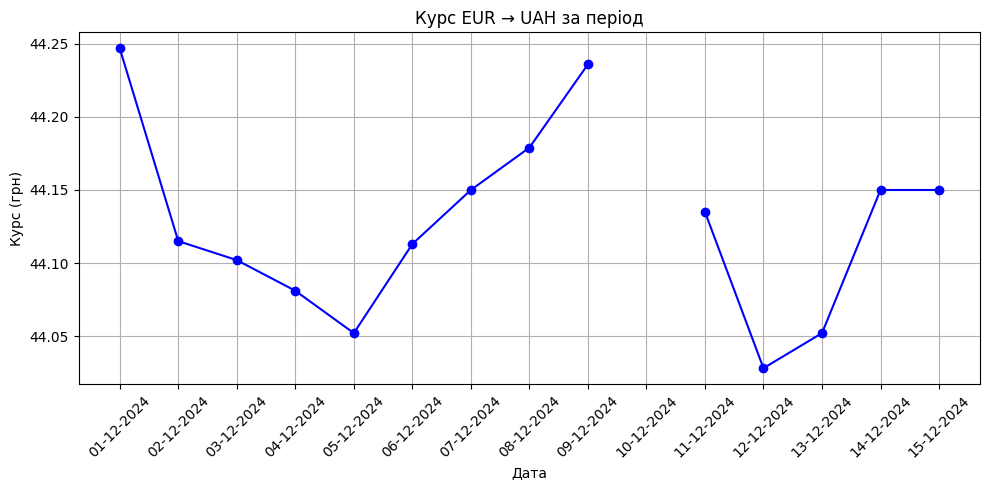


 Аналіз курсу EUR → UAH:
Мінімальний курс: 44.03 грн
Максимальний курс: 44.25 грн
Середній курс за період: 44.13 грн


In [ ]:
# --- Імпортуємо потрібні бібліотеки ---
from bs4 import BeautifulSoup as bs          # Імпортуємо BeautifulSoup для аналізу HTML
import requests                               # Імпортуємо requests для завантаження сторінки
import pandas as pd                           # Імпортуємо pandas для роботи з таблицями
from datetime import datetime, timedelta      # Для створення списку дат
import matplotlib.pyplot as plt               # Для побудови графіка

# --- Встановлюємо період ---
start_date = datetime(2024, 12, 1)            # Початкова дата
end_date = datetime(2024, 12, 15)             # Кінцева дата

# --- Створюємо список дат у потрібному форматі ---
dates = []                                    # Порожній список для збереження дат
current_date = start_date
while current_date <= end_date:               # Поки не дійшли до кінцевої дати
    dates.append(current_date.strftime('%d-%m-%Y'))    # Додаємо дату у форматі дд-мм-рррр
    current_date += timedelta(days=1)                   # Збільшуємо дату на 1 день

# --- Генеруємо URL-адреси для кожної дати ---
url_path = 'https://minfin.com.ua/ua/currency/converter/1-eur-to-uah/?converter-type=auction&date='
urls = [url_path + date for date in dates]    # Формуємо повні URL на основі дат

# --- Парсимо курси євро до гривні ---
eur_to_uah = []                               # Список для збереження курсів

for url in urls:                              # Проходимо по кожному посиланню
    response = requests.get(url)              # Завантажуємо HTML-сторінку
    full_page_html = bs(response.text, "html.parser")   # Розбираємо HTML

    widget_block = full_page_html.find('div', 'zlkj5-0 kIZRLg')    # Знаходимо блок з курсом

    if widget_block:                          # Якщо блок знайдено
        span_elements = widget_block.find_all('span', {'class': 'pyjcac-10 cWYHiB'})  # Знаходимо всі <span>

        if len(span_elements) >= 2:           # Якщо є принаймні 2 елементи
            exchange_rate = span_elements[1].text    # Отримуємо курс з другого <span>
        else:
            exchange_rate = None              # Якщо дані не знайдені — None
    else:
        exchange_rate = None

    eur_to_uah.append(exchange_rate)          # Додаємо курс до списку

# --- Формуємо таблицю (DataFrame) ---
exchange_data = {
    'Дата': dates,                            # Дати
    'Курс EUR→UAH': eur_to_uah                # Курси
}
df = pd.DataFrame(exchange_data)              # Створюємо таблицю

# --- Очищаємо дані від зайвого тексту (наприклад, символів "₴") ---
df['Курс'] = df['Курс EUR→UAH'].str.extract(r'(\d+\.\d+)')     # Витягуємо лише число
df['Курс'] = df['Курс'].astype(float)                          # Перетворюємо в число

# --- Виводимо таблицю ---
print(df)

# --- Побудова графіка курсу євро ---
plt.figure(figsize=(10, 5))                   # Розмір графіка
plt.plot(df['Дата'], df['Курс'], marker='o', color='blue')  # Малюємо лінію
plt.title('Курс EUR → UAH за період')         # Назва графіка
plt.xlabel('Дата')                            # Підпис осі X
plt.ylabel('Курс (грн)')                      # Підпис осі Y
plt.xticks(rotation=45)                       # Повертаємо дати для зручності
plt.grid(True)                                # Увімкнути сітку
plt.tight_layout()                            # Автоматично підлаштувати поля
plt.show()                                    # Показати графік

# --- Аналіз даних ---
min_rate = df['Курс'].min()                   # Мінімальний курс
max_rate = df['Курс'].max()                   # Максимальний курс
avg_rate = df['Курс'].mean()                  # Середній курс

print("\n Аналіз курсу EUR → UAH:")
print(f"Мінімальний курс: {min_rate:.2f} грн")
print(f"Максимальний курс: {max_rate:.2f} грн")
print(f"Середній курс за період: {avg_rate:.2f} грн")
